# Finding planets

## With Lightkurve
"A friendly Python package for making discoveries with Kepler & TESS."

Source: [lightkurve tutorials](https://docs.lightkurve.org/tutorials/index.html)

# 0. Import modules

In [31]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Search for Target Pixel Files

In [33]:
# Search for "KIC 6922244": star with confirmed planet
tpf = lk.search_targetpixelfile("KIC 6922244")
tpf

SearchResult containing 49 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 00 2009 Kepler    1800 kplr006922244      0.0
  1 Kepler Quarter 01 2009 Kepler    1800 kplr006922244      0.0
  2 Kepler Quarter 02 2009 Kepler      60 kplr006922244      0.0
  3 Kepler Quarter 02 2009 Kepler      60 kplr006922244      0.0
  4 Kepler Quarter 02 2009 Kepler      60 kplr006922244      0.0
  5 Kepler Quarter 02 2009 Kepler    1800 kplr006922244      0.0
  6 Kepler Quarter 03 2009 Kepler      60 kplr006922244      0.0
  7 Kepler Quarter 03 2009 Kepler      60 kplr006922244      0.0
  8 Kepler Quarter 03 2009 Kepler      60 kplr006922244      0.0
  9 Kepler Quarter 03 2009 Kepler    1800 kplr006922244      0.0
...               ...  ...    ...     ...           ...      ...
 39 Kepler Quarter 12 2012 Kepler      60 kplr006922244      0.0
 40 Kepler Quarter 12 2012 Kepler    1800 kplr006922244      0.0
 41 Kepler Quarter 13 2012 Kepler      60 kplr006922244      0.0
 42 Kepler Quarter 13 2012 Kepler      60 kplr006922244      0.0
 43 Kepler Quarter 13 2012 Kepler      60 kplr006922244      0.0
 44 Kepler Quarter 13 2012 Kepler    1800 kplr006922244      0.0
 45 Kepler Quarter 14 2012 Kepler    1800 kplr006922244      0.0
 46 Kepler Quarter 15 2013 Kepler    1800 kplr006922244      0.0
 47 Kepler Quarter 16 2013 Kepler    1800 kplr006922244      0.0
 48 Kepler Quarter 17 2013 Kepler    1800 kplr006922244      0.0
Length = 49 rows

In [35]:
search_result = lk.search_targetpixelfile("KIC 6922244", quarter=4)
search_result

SearchResult containing 4 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 04 2010 Kepler      60 kplr006922244      0.0
  1 Kepler Quarter 04 2010 Kepler      60 kplr006922244      0.0
  2 Kepler Quarter 04 2010 Kepler      60 kplr006922244      0.0
  3 Kepler Quarter 04 2010 Kepler    1800 kplr006922244      0.0

In [36]:
tpf = search_result[0].download()
tpf

KeplerTargetPixelFile Object (ID: 6922244)

<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 345880'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

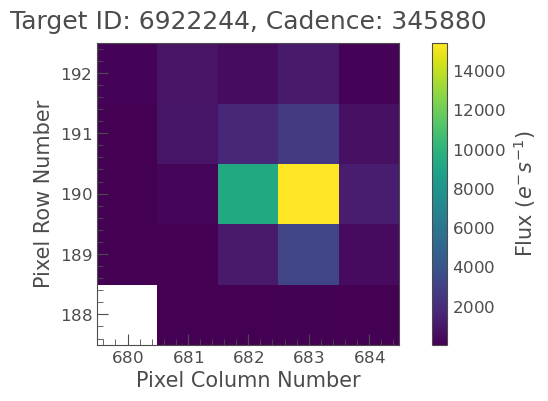

In [37]:
tpf.plot(frame=0)

In [38]:
tpf.animate()

# 2. Download Target Pixel Files
= Flexible Image Transport System

# 3. Convert to a light curve

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

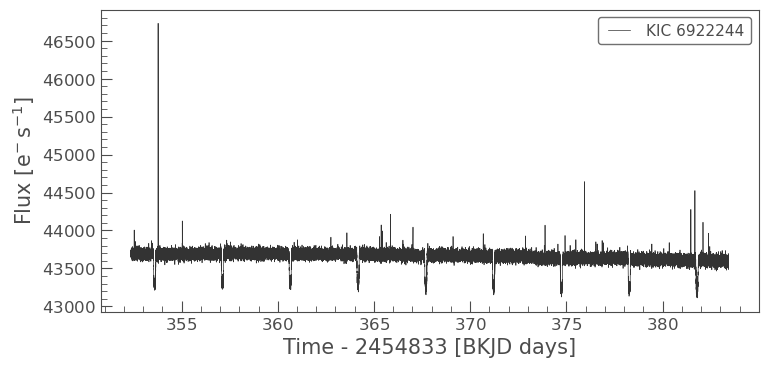

In [45]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot()

# 4. Flatten the plot

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

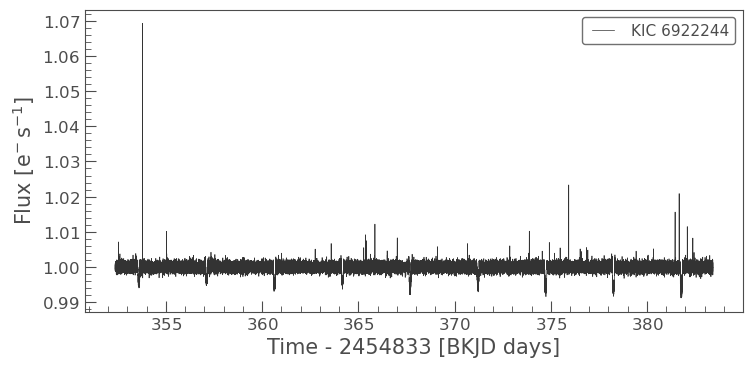

In [42]:
flat_lc = lc.flatten()
flat_lc.plot()

# 5. Compute transit period

Best fit period:  3.52300 d


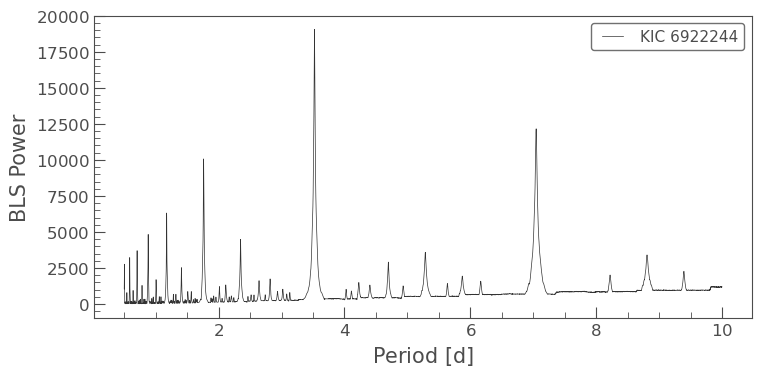

In [46]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.5, 10, 0.001))
periodogram.plot()
best_fit_period = periodogram.period_at_max_power
print(f"Best fit period: {best_fit_period: .5f}")

# 6. Fold the plot on 1 period

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

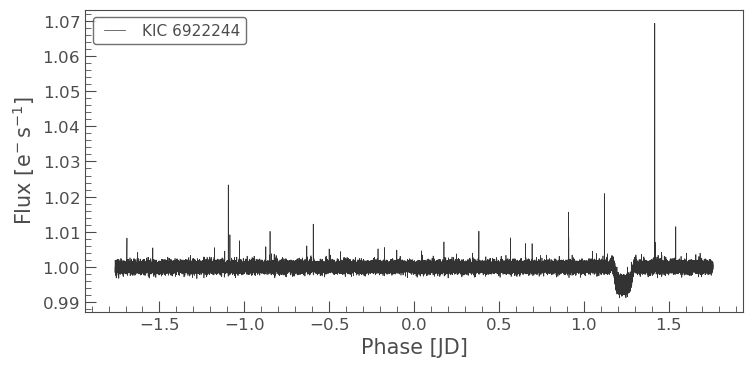

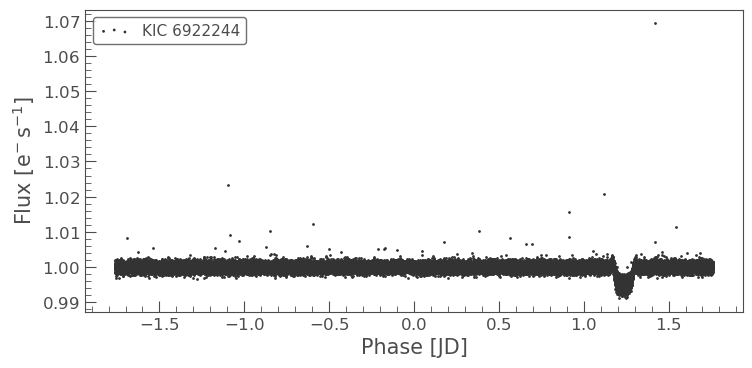

In [47]:
# 6. Fold the plot on 1 period
folded_lc = flat_lc.fold(period=best_fit_period)
folded_lc.plot()
folded_lc.scatter()

# Cheat code

In [ ]:
# 1. Search
search_result = lk.search_targetpixelfile("KIC 6922244")
search_result = lk.search_targetpixelfile("KIC 6922244", quarter=4)
search_result
search_result.table

# 2. Download
# quarter_idx = np.where(search_result.table['mission'] == 'Kepler Quarter 04')[0]
# search_result[quarter_index]
# tpf = search_result[quarter_idx].download()
tpf = search_result[3].download()
tpf_local = lk.read("core/assets/data/tess2020020091053-s0021-0000000001042868-0167-s_tp.fits")
tpf_local

# 2.1 Plot
tpf.plot(frame=0)
tpf.animate()

tpf.plot(aperture_mask=tpf.pipeline_mask)

# 3. Convert to lightcurve
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc
lc.plot()
lc.scatter()

# 4. Flatten the plot
flat_lc = lc.flatten()
flat_lc.plot()

# 5. Compute transit period
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.5, 10, 0.001))
periodogram.plot()
best_fit_period = periodogram.period_at_max_power
print(f"Best fit period: {best_fit_period: .5f}")

# 6. Fold the plot on 1 period
folded_lc = flat_lc.fold(period=best_fit_period)
folded_lc.plot()
folded_lc.scatter()

# Optional: Remove nan values with
lc.remove_nans()

In [48]:
tpf_local = lk.read("core/assets/data/tess2020020091053-s0021-0000000001042868-0167-s_tp.fits")
tpf_local

TessTargetPixelFile(TICID: 1042868)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

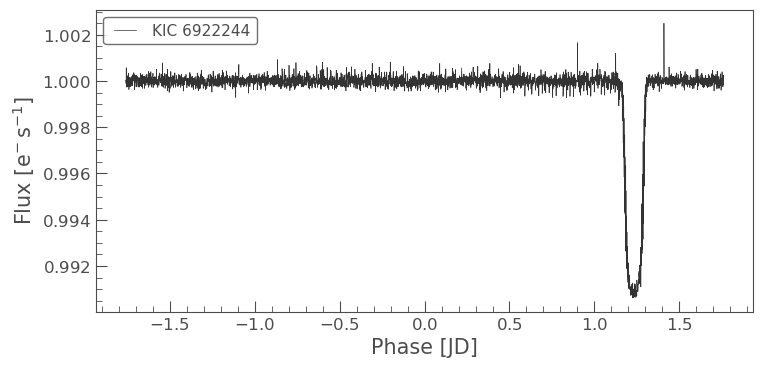

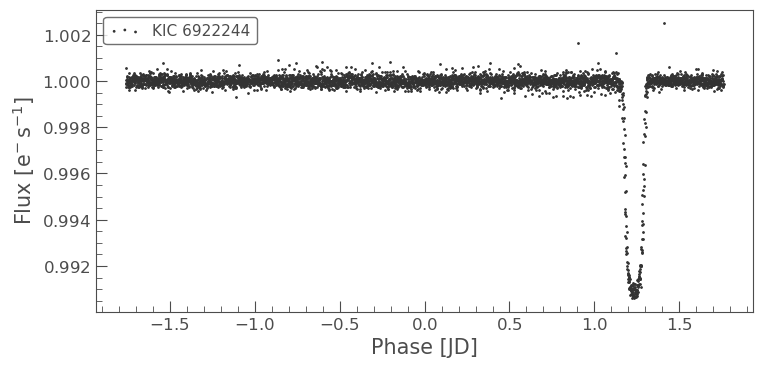